# Import libraries

In [1]:
import pandas as pd
import numpy as np

# Loading dataset

In [2]:
data=pd.read_csv("D:\Datasets\diabetes (1).csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Slicing dataset

In [3]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

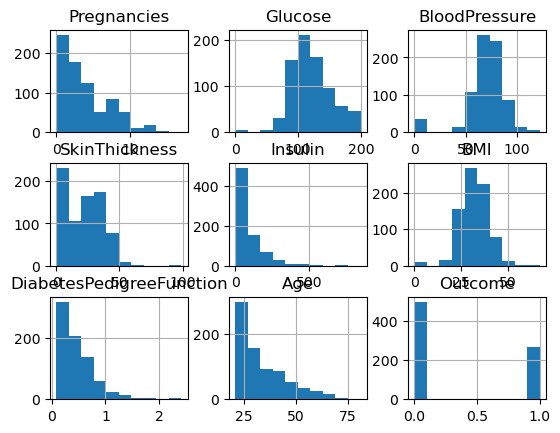

In [4]:
import seaborn as sns
data.hist()

# OverSampling

In [5]:
from imblearn.over_sampling import RandomOverSampler
ro=RandomOverSampler()
x_data,y_data=ro.fit_resample(x,y)

In [6]:
from collections import Counter
print("Actual Data:",Counter(y))
print("Artificial Data:",Counter(y_data))

Actual Data: Counter({0: 500, 1: 268})
Artificial Data: Counter({1: 500, 0: 500})


# Standardization

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x_data,y_data)

In [8]:
from collections import Counter
print(Counter(y_data))

Counter({1: 500, 0: 500})


# Split for train & test

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_data,random_state=11,test_size=0.2)

# Using Logistic Regression 

In [10]:
from sklearn.linear_model import LogisticRegression
l1=LogisticRegression()
l1.fit(x_train,y_train)

y_pred=l1.predict(x_test)
y_pred

from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)*100
ac

73.5

# Using Naive bayes

In [11]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

y_pred1=nb.predict(x_test)
y_pred1

from sklearn.metrics import accuracy_score
ac1=accuracy_score(y_test,y_pred1)*100
ac1

76.5

# MaxVoting

In [12]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=[("Logistic Regression",l1),("Naive Bayes",nb)])
vc.fit(x_train,y_train)

max_y_pred=vc.predict(x_test)
max_y_pred

from sklearn.metrics import accuracy_score
ac2=accuracy_score(max_y_pred,y_test)*100
ac2

76.0

# Bagging

In [13]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier(base_estimator=l1,n_estimators=9,random_state=9)
bc.fit(x_train,y_train)

bagging_y_pred=bc.predict(x_test)
bagging_y_pred

from sklearn.metrics import accuracy_score
ac3=accuracy_score(y_test,bagging_y_pred)*100
ac3

72.5

# Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=9,random_state=5)
rf.fit(x_train,y_train)

rf_y_pred=rf.predict(x_test)
rf_y_pred

from sklearn.metrics import accuracy_score
ac4=accuracy_score(y_test,rf_y_pred)*100
ac4

84.5

# Using Cross validation 
# K Fold

In [15]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,shuffle=True,random_state=3)
kf.get_n_splits(x_data)
print(kf)

KFold(n_splits=5, random_state=3, shuffle=True)


# Using For Loop

In [16]:
for train_index,test_index in kf.split(x_data):
    print("TRAIN:",train_index,"TEST:",test_index)
    x_train,x_test=x_data[train_index],x_data[test_index]
    y_train,y_test=y_data[train_index],y_data[test_index]
    
    from sklearn.model_selection import cross_val_score
    scores=cross_val_score(vc,x_train,y_train,cv=kf)
    print("Checking y_train balancing",Counter(y_train))
    print("Checking y_test balancing",Counter(y_test))
    print(scores)
    print(np.mean(scores)*100)
    
    from sklearn.model_selection import cross_val_score
    y_pred=cross_val_score(vc,x_test,y_test,cv=kf)

TRAIN: [  0   1   2   4   6   7   8   9  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  25  26  29  31  32  33  34  35  36  37  38  40  42  43
  44  46  47  49  50  52  53  54  55  56  57  59  60  62  63  66  67  68
  69  70  71  72  74  75  76  77  78  79  82  84  88  89  90  93  94  96
  97  98 100 102 104 105 106 107 109 110 111 112 113 114 115 116 117 119
 120 122 123 125 127 129 130 131 132 133 134 135 137 138 139 140 141 142
 143 146 147 148 149 150 151 152 153 154 156 158 159 160 161 162 163 165
 166 167 168 169 170 171 172 173 174 176 178 179 181 182 183 184 185 186
 187 188 190 191 196 198 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 217 218 219 220 221 222 223 224 225 226 228 229 230 231
 232 233 234 236 237 240 241 242 244 245 248 249 250 251 252 253 254 256
 257 258 259 260 261 262 263 265 267 268 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 288 289 291 292 295 296 297 298 299 300
 301 302 303 305 306 307 308 309 310 311 313

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Checking y_train balancing Counter({0: 407, 1: 393})
Checking y_test balancing Counter({1: 107, 0: 93})
[0.75    0.73125 0.73125 0.70625 0.75625]
73.50000000000001
TRAIN: [  0   1   2   3   5   6   7   8   9  10  11  12  13  15  17  18  20  21
  22  23  24  25  26  27  28  29  30  32  33  34  35  36  38  39  40  41
  42  44  45  47  48  49  50  51  52  54  55  57  58  59  60  61  62  63
  64  65  66  69  70  71  72  73  74  75  76  77  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  98  99 100 101 103 104
 108 110 113 114 117 118 119 120 121 122 124 125 126 128 129 130 131 133
 135 136 138 139 140 141 144 145 147 148 149 152 153 154 155 156 157 158
 160 161 162 164 165 166 167 168 171 172 173 174 175 176 177 178 179 180
 182 183 184 187 189 191 192 193 194 195 196 197 198 199 200 202 203 204
 205 207 208 210 212 213 216 217 218 219 220 221 222 223 225 226 227 228
 231 234 235 238 239 240 241 242 243 244 245 246 247 248 249 250 252 253
 254 255 256 257 258 259 2

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Checking y_train balancing Counter({0: 408, 1: 392})
Checking y_test balancing Counter({1: 108, 0: 92})
[0.725   0.7125  0.725   0.725   0.70625]
71.875
TRAIN: [  0   1   2   3   4   5   6   9  10  11  12  13  14  16  17  19  20  21
  22  26  27  28  30  31  32  33  34  35  36  37  38  39  41  42  43  44
  45  46  48  50  51  52  53  56  58  60  61  62  63  64  65  67  68  69
  72  73  74  75  76  77  78  80  81  83  84  85  86  87  89  90  91  92
  94  95  97  98  99 100 101 102 103 105 106 107 108 109 110 111 112 113
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 132 133 134 136
 137 140 141 142 143 144 145 146 148 149 150 151 152 154 155 156 157 159
 160 162 163 164 165 167 169 170 171 172 173 175 176 177 178 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 205 206 207 208 209 211 212 213 214 215 216 217 219 220 221 223 224
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 242 243 245
 246 247 248 249 251 252 253 255 256 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Checking y_train balancing Counter({1: 404, 0: 396})
Checking y_test balancing Counter({0: 104, 1: 96})
[0.725   0.7875  0.80625 0.7375  0.73125]
75.75
TRAIN: [  0   1   2   3   4   5   7   8   9  10  14  15  16  18  19  20  22  23
  24  25  26  27  28  29  30  31  32  33  35  36  37  39  40  41  43  44
  45  46  47  48  49  51  52  53  54  55  56  57  58  59  60  61  62  64
  65  66  67  68  70  71  73  76  78  79  80  81  82  83  85  86  87  88
  91  92  93  95  96  97  99 100 101 102 103 104 105 106 107 108 109 111
 112 113 114 115 116 117 118 119 120 121 123 124 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 141 142 143 144 145 146 147 148 150 151
 152 153 155 156 157 158 159 160 161 163 164 165 166 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 188 189 190 192
 193 194 195 197 199 200 201 202 203 204 206 209 210 211 212 214 215 216
 218 222 223 224 225 227 229 230 232 233 235 236 237 238 239 241 242 243
 244 246 247 249 250 251 252 254 255 2

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Checking y_train balancing Counter({1: 406, 0: 394})
Checking y_test balancing Counter({0: 106, 1: 94})
[0.73125 0.7875  0.70625 0.74375 0.70625]
73.5
TRAIN: [  3   4   5   6   7   8  10  11  12  13  14  15  16  17  18  19  21  23
  24  25  27  28  29  30  31  34  37  38  39  40  41  42  43  45  46  47
  48  49  50  51  53  54  55  56  57  58  59  61  63  64  65  66  67  68
  69  70  71  72  73  74  75  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 101 102 103 104 105 106
 107 108 109 110 111 112 114 115 116 118 121 122 123 124 125 126 127 128
 129 130 131 132 134 135 136 137 138 139 140 142 143 144 145 146 147 149
 150 151 153 154 155 157 158 159 161 162 163 164 166 167 168 169 170 174
 175 177 179 180 181 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 201 202 203 204 205 206 207 208 209 210 211 213 214 215 216 217
 218 219 220 221 222 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 243 244 245 246 24

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Checking y_train balancing Counter({1: 405, 0: 395})
Checking y_test balancing Counter({0: 105, 1: 95})
[0.68125 0.775   0.75625 0.75    0.7625 ]
74.49999999999999


C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [17]:
for train_index,test_index in kf.split(x_data):
    print("TRAIN:",train_index,"TEST:",test_index)
    x_train,x_test=x_data[train_index],x_data[test_index]
    y_train,y_test=y_data[train_index],y_data[test_index]
    
    from sklearn.model_selection import cross_val_score
    scores=cross_val_score(bc,x_train,y_train,cv=kf)
    print("Checking y_train balancing",Counter(y_train))
    print("Checking y_test balancing",Counter(y_test))
    print(scores)
    print(np.mean(scores)*100)
    
    from sklearn.model_selection import cross_val_score
    y_pred=cross_val_score(bc,x_test,y_test,cv=kf)

TRAIN: [  0   1   2   4   6   7   8   9  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  25  26  29  31  32  33  34  35  36  37  38  40  42  43
  44  46  47  49  50  52  53  54  55  56  57  59  60  62  63  66  67  68
  69  70  71  72  74  75  76  77  78  79  82  84  88  89  90  93  94  96
  97  98 100 102 104 105 106 107 109 110 111 112 113 114 115 116 117 119
 120 122 123 125 127 129 130 131 132 133 134 135 137 138 139 140 141 142
 143 146 147 148 149 150 151 152 153 154 156 158 159 160 161 162 163 165
 166 167 168 169 170 171 172 173 174 176 178 179 181 182 183 184 185 186
 187 188 190 191 196 198 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 217 218 219 220 221 222 223 224 225 226 228 229 230 231
 232 233 234 236 237 240 241 242 244 245 248 249 250 251 252 253 254 256
 257 258 259 260 261 262 263 265 267 268 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 288 289 291 292 295 296 297 298 299 300
 301 302 303 305 306 307 308 309 310 311 313

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Checking y_train balancing Counter({0: 407, 1: 393})
Checking y_test balancing Counter({1: 107, 0: 93})
[0.7375  0.71875 0.70625 0.7375  0.7875 ]
73.75


C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

TRAIN: [  0   1   2   3   5   6   7   8   9  10  11  12  13  15  17  18  20  21
  22  23  24  25  26  27  28  29  30  32  33  34  35  36  38  39  40  41
  42  44  45  47  48  49  50  51  52  54  55  57  58  59  60  61  62  63
  64  65  66  69  70  71  72  73  74  75  76  77  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  98  99 100 101 103 104
 108 110 113 114 117 118 119 120 121 122 124 125 126 128 129 130 131 133
 135 136 138 139 140 141 144 145 147 148 149 152 153 154 155 156 157 158
 160 161 162 164 165 166 167 168 171 172 173 174 175 176 177 178 179 180
 182 183 184 187 189 191 192 193 194 195 196 197 198 199 200 202 203 204
 205 207 208 210 212 213 216 217 218 219 220 221 222 223 225 226 227 228
 231 234 235 238 239 240 241 242 243 244 245 246 247 248 249 250 252 253
 254 255 256 257 258 259 260 262 264 265 266 267 268 269 270 271 272 273
 274 275 276 277 278 280 281 282 283 284 285 286 287 289 290 292 293 294
 295 296 297 298 299 300 302 304 305 306 307

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Checking y_train balancing Counter({0: 408, 1: 392})
Checking y_test balancing Counter({1: 108, 0: 92})
[0.75    0.74375 0.7     0.76875 0.74375]
74.12499999999999


C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

TRAIN: [  0   1   2   3   4   5   6   9  10  11  12  13  14  16  17  19  20  21
  22  26  27  28  30  31  32  33  34  35  36  37  38  39  41  42  43  44
  45  46  48  50  51  52  53  56  58  60  61  62  63  64  65  67  68  69
  72  73  74  75  76  77  78  80  81  83  84  85  86  87  89  90  91  92
  94  95  97  98  99 100 101 102 103 105 106 107 108 109 110 111 112 113
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 132 133 134 136
 137 140 141 142 143 144 145 146 148 149 150 151 152 154 155 156 157 159
 160 162 163 164 165 167 169 170 171 172 173 175 176 177 178 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 205 206 207 208 209 211 212 213 214 215 216 217 219 220 221 223 224
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 242 243 245
 246 247 248 249 251 252 253 255 256 257 258 259 260 261 262 263 264 265
 266 267 269 270 273 274 275 277 278 279 281 282 285 287 288 289 290 291
 292 293 294 295 297 299 300 301 302 303 304

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Checking y_train balancing Counter({1: 404, 0: 396})
Checking y_test balancing Counter({0: 104, 1: 96})
[0.74375 0.8     0.8     0.7     0.7    ]
74.875


C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

TRAIN: [  0   1   2   3   4   5   7   8   9  10  14  15  16  18  19  20  22  23
  24  25  26  27  28  29  30  31  32  33  35  36  37  39  40  41  43  44
  45  46  47  48  49  51  52  53  54  55  56  57  58  59  60  61  62  64
  65  66  67  68  70  71  73  76  78  79  80  81  82  83  85  86  87  88
  91  92  93  95  96  97  99 100 101 102 103 104 105 106 107 108 109 111
 112 113 114 115 116 117 118 119 120 121 123 124 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 141 142 143 144 145 146 147 148 150 151
 152 153 155 156 157 158 159 160 161 163 164 165 166 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 188 189 190 192
 193 194 195 197 199 200 201 202 203 204 206 209 210 211 212 214 215 216
 218 222 223 224 225 227 229 230 232 233 235 236 237 238 239 241 242 243
 244 246 247 249 250 251 252 254 255 256 257 258 261 263 264 266 267 268
 269 270 271 272 274 275 276 277 279 280 283 284 285 286 287 288 289 290
 291 292 293 294 295 296 298 300 301 303 304

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Checking y_train balancing Counter({1: 406, 0: 394})
Checking y_test balancing Counter({0: 106, 1: 94})
[0.7375 0.7875 0.6875 0.75   0.75  ]
74.25


C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

TRAIN: [  3   4   5   6   7   8  10  11  12  13  14  15  16  17  18  19  21  23
  24  25  27  28  29  30  31  34  37  38  39  40  41  42  43  45  46  47
  48  49  50  51  53  54  55  56  57  58  59  61  63  64  65  66  67  68
  69  70  71  72  73  74  75  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 101 102 103 104 105 106
 107 108 109 110 111 112 114 115 116 118 121 122 123 124 125 126 127 128
 129 130 131 132 134 135 136 137 138 139 140 142 143 144 145 146 147 149
 150 151 153 154 155 157 158 159 161 162 163 164 166 167 168 169 170 174
 175 177 179 180 181 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 201 202 203 204 205 206 207 208 209 210 211 213 214 215 216 217
 218 219 220 221 222 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 243 244 245 246 247 248 250 251 253 254 255 259 260
 261 262 263 264 265 266 268 269 270 271 272 273 276 278 279 280 281 282
 283 284 286 287 288 290 291 293 294 296 297

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Checking y_train balancing Counter({1: 405, 0: 395})
Checking y_test balancing Counter({0: 105, 1: 95})
[0.6875  0.7625  0.75625 0.7625  0.78125]
75.0


C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [18]:
for train_index,test_index in kf.split(x_data):
    print("TRAIN:",train_index,"TEST:",test_index)
    x_train,x_test=x_data[train_index],x_data[test_index]
    y_train,y_test=y_data[train_index],y_data[test_index]
    
    from sklearn.model_selection import cross_val_score
    scores=cross_val_score(rf,x_train,y_train,cv=kf)
    print("Checking y_train balancing",Counter(y_train))
    print("Checking y_test balancing",Counter(y_test))
    print(scores)
    print(np.mean(scores)*100)
    
    from sklearn.model_selection import cross_val_score
    y_pred=cross_val_score(rf,x_test,y_test,cv=kf)

TRAIN: [  0   1   2   4   6   7   8   9  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  25  26  29  31  32  33  34  35  36  37  38  40  42  43
  44  46  47  49  50  52  53  54  55  56  57  59  60  62  63  66  67  68
  69  70  71  72  74  75  76  77  78  79  82  84  88  89  90  93  94  96
  97  98 100 102 104 105 106 107 109 110 111 112 113 114 115 116 117 119
 120 122 123 125 127 129 130 131 132 133 134 135 137 138 139 140 141 142
 143 146 147 148 149 150 151 152 153 154 156 158 159 160 161 162 163 165
 166 167 168 169 170 171 172 173 174 176 178 179 181 182 183 184 185 186
 187 188 190 191 196 198 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 217 218 219 220 221 222 223 224 225 226 228 229 230 231
 232 233 234 236 237 240 241 242 244 245 248 249 250 251 252 253 254 256
 257 258 259 260 261 262 263 265 267 268 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 288 289 291 292 295 296 297 298 299 300
 301 302 303 305 306 307 308 309 310 311 313

Checking y_train balancing Counter({0: 408, 1: 392})
Checking y_test balancing Counter({1: 108, 0: 92})
[0.80625 0.84375 0.7875  0.7875  0.7875 ]
80.25
TRAIN: [  0   1   2   3   4   5   6   9  10  11  12  13  14  16  17  19  20  21
  22  26  27  28  30  31  32  33  34  35  36  37  38  39  41  42  43  44
  45  46  48  50  51  52  53  56  58  60  61  62  63  64  65  67  68  69
  72  73  74  75  76  77  78  80  81  83  84  85  86  87  89  90  91  92
  94  95  97  98  99 100 101 102 103 105 106 107 108 109 110 111 112 113
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 132 133 134 136
 137 140 141 142 143 144 145 146 148 149 150 151 152 154 155 156 157 159
 160 162 163 164 165 167 169 170 171 172 173 175 176 177 178 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 205 206 207 208 209 211 212 213 214 215 216 217 219 220 221 223 224
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 242 243 245
 246 247 248 249 251 252 253 255 256 2

Checking y_train balancing Counter({1: 406, 0: 394})
Checking y_test balancing Counter({0: 106, 1: 94})
[0.79375 0.84375 0.8125  0.7625  0.85625]
81.37500000000001
TRAIN: [  3   4   5   6   7   8  10  11  12  13  14  15  16  17  18  19  21  23
  24  25  27  28  29  30  31  34  37  38  39  40  41  42  43  45  46  47
  48  49  50  51  53  54  55  56  57  58  59  61  63  64  65  66  67  68
  69  70  71  72  73  74  75  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 101 102 103 104 105 106
 107 108 109 110 111 112 114 115 116 118 121 122 123 124 125 126 127 128
 129 130 131 132 134 135 136 137 138 139 140 142 143 144 145 146 147 149
 150 151 153 154 155 157 158 159 161 162 163 164 166 167 168 169 170 174
 175 177 179 180 181 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 201 202 203 204 205 206 207 208 209 210 211 213 214 215 216 217
 218 219 220 221 222 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 243 2

# Stratified K Fold

In [19]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=3)
skf.get_n_splits(x_data,y_data)
print(skf)

StratifiedKFold(n_splits=5, random_state=3, shuffle=True)


# Using For Loop

In [20]:
for train_index,test_index in skf.split(x_data,y_data):
    print("TRAIN:",train_index,"TEST:",test_index)
    x_train,x_test=x_data[train_index],x_data[test_index]
    y_train,y_test=y_data[train_index],y_data[test_index]
    
     
    from sklearn.model_selection import cross_val_score
    scores=cross_val_score(bc,x_train,y_train,cv=skf)
    print("Checking y_train balancing",Counter(y_train))
    print("Checking y_test balancing",Counter(y_test))
    print(scores)
    print(np.mean(scores)*100)
    
    from sklearn.model_selection import cross_val_score
    y_pred=cross_val_score(bc,x_test,y_test,cv=skf)

TRAIN: [  0   1   2   3   6   7   8   9  10  11  12  14  15  16  17  18  19  20
  21  22  23  24  25  27  28  29  30  31  33  34  35  36  37  38  39  40
  41  43  44  46  47  49  50  51  53  55  56  59  60  61  62  64  65  66
  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  88  89  90  92  93  94  96  97  98  99 100 102 104 107 108 109 110
 111 112 114 115 116 118 119 120 121 124 125 126 127 128 129 131 132 133
 135 136 139 140 141 142 143 144 146 147 148 149 150 151 154 155 156 159
 160 161 162 163 164 165 167 168 169 170 172 173 176 179 180 181 182 183
 186 187 189 190 191 192 193 194 195 196 197 199 200 202 203 204 205 206
 207 209 211 212 213 214 216 217 218 219 220 222 223 224 225 226 227 228
 229 230 231 232 233 234 235 236 237 238 239 240 242 243 245 247 248 249
 250 251 253 254 255 257 258 259 260 261 263 264 265 266 268 269 270 271
 272 273 275 276 278 279 280 281 282 283 284 285 286 287 288 290 291 293
 294 295 296 297 298 299 301 302 303 304 306

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Checking y_train balancing Counter({1: 400, 0: 400})
Checking y_test balancing Counter({1: 100, 0: 100})
[0.75    0.70625 0.7375  0.75    0.8    ]
74.875


C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

TRAIN: [  1   2   3   4   5   6   7   9  10  11  12  13  14  15  18  19  20  21
  22  23  25  26  28  29  30  32  33  34  36  37  41  42  43  44  45  46
  47  48  49  51  52  54  56  57  58  59  60  61  62  63  64  65  66  68
  69  70  71  72  73  74  76  77  79  80  81  82  83  84  85  86  87  90
  91  92  93  94  95  96  98  99 100 101 103 105 106 107 109 110 111 112
 113 115 117 120 121 122 123 126 127 128 129 130 132 133 134 135 137 138
 139 140 141 144 145 146 147 148 150 151 152 153 156 157 158 159 161 162
 164 165 166 167 168 169 171 172 173 174 175 176 177 178 179 181 182 183
 184 185 186 187 188 189 191 192 193 194 195 196 197 198 201 202 203 204
 205 206 207 208 209 210 211 213 214 215 217 220 221 222 225 226 227 229
 231 232 233 234 235 236 237 240 241 242 243 244 245 246 247 249 250 251
 252 253 254 256 257 258 259 260 261 262 263 264 265 267 268 270 271 274
 275 276 277 279 281 283 284 287 289 291 292 295 296 297 299 300 301 302
 303 304 305 307 308 309 310 311 315 317 318

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Checking y_train balancing Counter({0: 400, 1: 400})
Checking y_test balancing Counter({1: 100, 0: 100})
[0.775   0.7     0.69375 0.73125 0.8    ]
74.0


C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

TRAIN: [  0   3   4   5   7   8   9  10  11  13  15  16  17  20  21  22  23  24
  25  26  27  29  30  31  32  33  34  35  37  38  39  40  42  43  44  45
  48  49  50  52  53  54  55  57  58  59  60  61  62  63  64  65  67  68
  70  71  72  75  77  78  79  80  81  82  86  87  88  89  90  91  94  95
  97  98  99 100 101 102 103 104 105 106 108 109 111 112 113 114 116 117
 118 119 121 122 123 124 125 126 127 129 130 131 132 133 134 136 137 138
 140 141 142 143 145 146 147 149 150 152 153 154 155 157 158 160 161 162
 163 165 166 167 168 169 170 171 174 175 176 177 178 180 181 182 183 184
 185 187 188 190 191 193 195 196 197 198 199 200 201 203 206 208 209 210
 211 212 213 214 215 216 218 219 220 221 222 223 224 226 227 228 229 230
 231 232 233 235 237 238 239 240 241 243 244 245 246 247 248 252 253 254
 255 256 257 258 259 260 261 262 263 266 267 269 271 272 273 274 276 277
 278 279 280 281 282 284 285 286 288 289 290 291 292 293 294 295 296 297
 298 299 300 302 303 304 305 306 308 309 310

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Checking y_train balancing Counter({1: 400, 0: 400})
Checking y_test balancing Counter({0: 100, 1: 100})
[0.75    0.6875  0.75    0.78125 0.75625]
74.5


C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

TRAIN: [  0   1   2   4   5   6   7   8   9  12  13  14  15  16  17  18  19  20
  21  23  24  25  26  27  28  29  31  32  33  35  36  37  38  39  40  41
  42  43  45  46  47  48  50  51  52  53  54  55  56  57  58  59  60  61
  62  63  65  66  67  69  71  73  74  75  76  77  78  80  81  83  84  85
  86  87  88  89  91  92  93  94  95  96  97  98 100 101 102 103 104 105
 106 107 108 110 112 113 114 115 116 117 118 119 120 122 123 124 125 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 148 149 151 152 153 154 155 156 157 158 159 160 161 162 163 164 166 168
 170 171 172 173 174 175 177 178 179 180 184 185 186 188 189 190 191 192
 193 194 198 199 200 201 202 204 205 207 208 210 212 213 215 216 217 218
 219 221 222 223 224 225 226 227 228 229 230 231 232 233 234 236 237 238
 239 240 241 242 244 246 248 249 250 251 252 253 255 256 258 260 262 263
 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281
 282 283 285 286 287 288 289 290 292 293 294

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Checking y_train balancing Counter({1: 400, 0: 400})
Checking y_test balancing Counter({0: 100, 1: 100})
[0.725   0.75625 0.75625 0.66875 0.75625]
73.25


C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

TRAIN: [  0   1   2   3   4   5   6   8  10  11  12  13  14  16  17  18  19  22
  24  26  27  28  30  31  32  34  35  36  38  39  40  41  42  44  45  46
  47  48  49  50  51  52  53  54  55  56  57  58  63  64  66  67  68  69
  70  72  73  74  75  76  78  79  82  83  84  85  86  87  88  89  90  91
  92  93  95  96  97  99 101 102 103 104 105 106 107 108 109 110 111 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 130 131 134
 135 136 137 138 139 142 143 144 145 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 163 164 165 166 167 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 192 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 214 215
 216 217 218 219 220 221 223 224 225 228 230 234 235 236 238 239 241 242
 243 244 245 246 247 248 249 250 251 252 254 255 256 257 259 261 262 264
 265 266 267 268 269 270 272 273 274 275 277 278 280 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 298 299

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Checking y_train balancing Counter({1: 400, 0: 400})
Checking y_test balancing Counter({0: 100, 1: 100})
[0.74375 0.70625 0.7375  0.7375  0.75625]
73.625


C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [21]:
for train_index,test_index in skf.split(x_data,y_data):
    print("TRAIN:",train_index,"TEST:",test_index)
    x_train,x_test=x_data[train_index],x_data[test_index]
    y_train,y_test=y_data[train_index],y_data[test_index]
    
     
    from sklearn.model_selection import cross_val_score
    scores=cross_val_score(vc,x_train,y_train,cv=skf)
    print("Checking y_train balancing",Counter(y_train))
    print("Checking y_test balancing",Counter(y_test))
    print(scores)
    print(np.mean(scores)*100)
    
    from sklearn.model_selection import cross_val_score
    y_pred=cross_val_score(l1,x_test,y_test,cv=skf)

TRAIN: [  0   1   2   3   6   7   8   9  10  11  12  14  15  16  17  18  19  20
  21  22  23  24  25  27  28  29  30  31  33  34  35  36  37  38  39  40
  41  43  44  46  47  49  50  51  53  55  56  59  60  61  62  64  65  66
  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  88  89  90  92  93  94  96  97  98  99 100 102 104 107 108 109 110
 111 112 114 115 116 118 119 120 121 124 125 126 127 128 129 131 132 133
 135 136 139 140 141 142 143 144 146 147 148 149 150 151 154 155 156 159
 160 161 162 163 164 165 167 168 169 170 172 173 176 179 180 181 182 183
 186 187 189 190 191 192 193 194 195 196 197 199 200 202 203 204 205 206
 207 209 211 212 213 214 216 217 218 219 220 222 223 224 225 226 227 228
 229 230 231 232 233 234 235 236 237 238 239 240 242 243 245 247 248 249
 250 251 253 254 255 257 258 259 260 261 263 264 265 266 268 269 270 271
 272 273 275 276 278 279 280 281 282 283 284 285 286 287 288 290 291 293
 294 295 296 297 298 299 301 302 303 304 306

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Checking y_train balancing Counter({1: 400, 0: 400})
Checking y_test balancing Counter({1: 100, 0: 100})
[0.7     0.71875 0.75625 0.725   0.74375]
72.875
TRAIN: [  1   2   3   4   5   6   7   9  10  11  12  13  14  15  18  19  20  21
  22  23  25  26  28  29  30  32  33  34  36  37  41  42  43  44  45  46
  47  48  49  51  52  54  56  57  58  59  60  61  62  63  64  65  66  68
  69  70  71  72  73  74  76  77  79  80  81  82  83  84  85  86  87  90
  91  92  93  94  95  96  98  99 100 101 103 105 106 107 109 110 111 112
 113 115 117 120 121 122 123 126 127 128 129 130 132 133 134 135 137 138
 139 140 141 144 145 146 147 148 150 151 152 153 156 157 158 159 161 162
 164 165 166 167 168 169 171 172 173 174 175 176 177 178 179 181 182 183
 184 185 186 187 188 189 191 192 193 194 195 196 197 198 201 202 203 204
 205 206 207 208 209 210 211 213 214 215 217 220 221 222 225 226 227 229
 231 232 233 234 235 236 237 240 241 242 243 244 245 246 247 249 250 251
 252 253 254 256 257 258 259 260 261

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Checking y_train balancing Counter({0: 400, 1: 400})
Checking y_test balancing Counter({1: 100, 0: 100})
[0.70625 0.6625  0.71875 0.75625 0.75625]
72.0
TRAIN: [  0   3   4   5   7   8   9  10  11  13  15  16  17  20  21  22  23  24
  25  26  27  29  30  31  32  33  34  35  37  38  39  40  42  43  44  45
  48  49  50  52  53  54  55  57  58  59  60  61  62  63  64  65  67  68
  70  71  72  75  77  78  79  80  81  82  86  87  88  89  90  91  94  95
  97  98  99 100 101 102 103 104 105 106 108 109 111 112 113 114 116 117
 118 119 121 122 123 124 125 126 127 129 130 131 132 133 134 136 137 138
 140 141 142 143 145 146 147 149 150 152 153 154 155 157 158 160 161 162
 163 165 166 167 168 169 170 171 174 175 176 177 178 180 181 182 183 184
 185 187 188 190 191 193 195 196 197 198 199 200 201 203 206 208 209 210
 211 212 213 214 215 216 218 219 220 221 222 223 224 226 227 228 229 230
 231 232 233 235 237 238 239 240 241 243 244 245 246 247 248 252 253 254
 255 256 257 258 259 260 261 262 263 2

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Checking y_train balancing Counter({1: 400, 0: 400})
Checking y_test balancing Counter({0: 100, 1: 100})
[0.775  0.7125 0.7375 0.7625 0.7375]
74.49999999999999
TRAIN: [  0   1   2   4   5   6   7   8   9  12  13  14  15  16  17  18  19  20
  21  23  24  25  26  27  28  29  31  32  33  35  36  37  38  39  40  41
  42  43  45  46  47  48  50  51  52  53  54  55  56  57  58  59  60  61
  62  63  65  66  67  69  71  73  74  75  76  77  78  80  81  83  84  85
  86  87  88  89  91  92  93  94  95  96  97  98 100 101 102 103 104 105
 106 107 108 110 112 113 114 115 116 117 118 119 120 122 123 124 125 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 148 149 151 152 153 154 155 156 157 158 159 160 161 162 163 164 166 168
 170 171 172 173 174 175 177 178 179 180 184 185 186 188 189 190 191 192
 193 194 198 199 200 201 202 204 205 207 208 210 212 213 215 216 217 218
 219 221 222 223 224 225 226 227 228 229 230 231 232 233 234 236 237 238
 239 240 241 242 244 246 248 2

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Checking y_train balancing Counter({1: 400, 0: 400})
Checking y_test balancing Counter({0: 100, 1: 100})
[0.68125 0.75625 0.7125  0.69375 0.73125]
71.50000000000001
TRAIN: [  0   1   2   3   4   5   6   8  10  11  12  13  14  16  17  18  19  22
  24  26  27  28  30  31  32  34  35  36  38  39  40  41  42  44  45  46
  47  48  49  50  51  52  53  54  55  56  57  58  63  64  66  67  68  69
  70  72  73  74  75  76  78  79  82  83  84  85  86  87  88  89  90  91
  92  93  95  96  97  99 101 102 103 104 105 106 107 108 109 110 111 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 130 131 134
 135 136 137 138 139 142 143 144 145 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 163 164 165 166 167 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 192 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 214 215
 216 217 218 219 220 221 223 224 225 228 230 234 235 236 238 239 241 242
 243 244 245 246 247 248 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Checking y_train balancing Counter({1: 400, 0: 400})
Checking y_test balancing Counter({0: 100, 1: 100})
[0.73125 0.7125  0.73125 0.70625 0.78125]
73.25


C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [22]:
for train_index,test_index in skf.split(x_data,y_data):
    print("TRAIN:",train_index,"TEST:",test_index)
    x_train,x_test=x_data[train_index],x_data[test_index]
    y_train,y_test=y_data[train_index],y_data[test_index]
    
     
    from sklearn.model_selection import cross_val_score
    scores=cross_val_score(rf,x_train,y_train,cv=skf)
    print("Checking y_train balancing",Counter(y_train))
    print("Checking y_test balancing",Counter(y_test))
    print(scores)
    print(np.mean(scores)*100)
    
    from sklearn.model_selection import cross_val_score
    y_pred=cross_val_score(rf,x_test,y_test,cv=skf)

TRAIN: [  0   1   2   3   6   7   8   9  10  11  12  14  15  16  17  18  19  20
  21  22  23  24  25  27  28  29  30  31  33  34  35  36  37  38  39  40
  41  43  44  46  47  49  50  51  53  55  56  59  60  61  62  64  65  66
  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  88  89  90  92  93  94  96  97  98  99 100 102 104 107 108 109 110
 111 112 114 115 116 118 119 120 121 124 125 126 127 128 129 131 132 133
 135 136 139 140 141 142 143 144 146 147 148 149 150 151 154 155 156 159
 160 161 162 163 164 165 167 168 169 170 172 173 176 179 180 181 182 183
 186 187 189 190 191 192 193 194 195 196 197 199 200 202 203 204 205 206
 207 209 211 212 213 214 216 217 218 219 220 222 223 224 225 226 227 228
 229 230 231 232 233 234 235 236 237 238 239 240 242 243 245 247 248 249
 250 251 253 254 255 257 258 259 260 261 263 264 265 266 268 269 270 271
 272 273 275 276 278 279 280 281 282 283 284 285 286 287 288 290 291 293
 294 295 296 297 298 299 301 302 303 304 306

TRAIN: [  0   3   4   5   7   8   9  10  11  13  15  16  17  20  21  22  23  24
  25  26  27  29  30  31  32  33  34  35  37  38  39  40  42  43  44  45
  48  49  50  52  53  54  55  57  58  59  60  61  62  63  64  65  67  68
  70  71  72  75  77  78  79  80  81  82  86  87  88  89  90  91  94  95
  97  98  99 100 101 102 103 104 105 106 108 109 111 112 113 114 116 117
 118 119 121 122 123 124 125 126 127 129 130 131 132 133 134 136 137 138
 140 141 142 143 145 146 147 149 150 152 153 154 155 157 158 160 161 162
 163 165 166 167 168 169 170 171 174 175 176 177 178 180 181 182 183 184
 185 187 188 190 191 193 195 196 197 198 199 200 201 203 206 208 209 210
 211 212 213 214 215 216 218 219 220 221 222 223 224 226 227 228 229 230
 231 232 233 235 237 238 239 240 241 243 244 245 246 247 248 252 253 254
 255 256 257 258 259 260 261 262 263 266 267 269 271 272 273 274 276 277
 278 279 280 281 282 284 285 286 288 289 290 291 292 293 294 295 296 297
 298 299 300 302 303 304 305 306 308 309 310

TRAIN: [  0   1   2   3   4   5   6   8  10  11  12  13  14  16  17  18  19  22
  24  26  27  28  30  31  32  34  35  36  38  39  40  41  42  44  45  46
  47  48  49  50  51  52  53  54  55  56  57  58  63  64  66  67  68  69
  70  72  73  74  75  76  78  79  82  83  84  85  86  87  88  89  90  91
  92  93  95  96  97  99 101 102 103 104 105 106 107 108 109 110 111 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 130 131 134
 135 136 137 138 139 142 143 144 145 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 163 164 165 166 167 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 192 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 214 215
 216 217 218 219 220 221 223 224 225 228 230 234 235 236 238 239 241 242
 243 244 245 246 247 248 249 250 251 252 254 255 256 257 259 261 262 264
 265 266 267 268 269 270 272 273 274 275 277 278 280 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 298 299

# ShuffleSplit

In [23]:
from sklearn.model_selection import ShuffleSplit
ss=ShuffleSplit(n_splits=5,random_state=3)
ss.get_n_splits(x_data)
print(ss)

ShuffleSplit(n_splits=5, random_state=3, test_size=None, train_size=None)


In [24]:
for train_index,test_index in ss.split(x_data,y_data):
    print("TRAIN:",train_index,"TEST:",test_index)
    x_train,x_test=x_data[train_index],x_data[test_index]
    y_train,y_test=y_data[train_index],y_data[test_index]
    
     
    from sklearn.model_selection import cross_val_score
    scores=cross_val_score(rf,x_train,y_train,cv=ss)
    print("Checking y_train balancing",Counter(y_train))
    print("Checking y_test balancing",Counter(y_test))
    print(scores)
    print(np.mean(scores)*100)
    
    from sklearn.model_selection import cross_val_score
    y_pred=cross_val_score(rf,x_test,y_test,cv=skf)

TRAIN: [445 529  65 358 631 988  92  30  73 447 293 726 429 791 595 924 928 985
 406 620 400 227 661 546 239 682 793  91 781 175 194 439 579 192 499 145
 932 563 523 144 536  86 328 724 101 822  39 339 883 810 639 136  80 126
 118 838 464 859 391  95 919 775 269 108 189 667 898 124 287 321  41 409
   5  64 216  45 235 997   3 534 806 450 676 565 614 741 336 452 468 521
 304 721 333 290 526 164 782 575 992 713  78 109 201 465 143 905 206 263
 330 102 771  46   4 767 123 491 211 362 808 440 232 757 478 628 921 902
 869 567 214 472 137 799 984 111 415 842  16 846 134 868 651 694 190 401
 698 146 897 705 458 349 942 962 237 914 301 347 549 386 448 640 314 105
 163 994 837 127 702 635 469 753 971 378  31 700 697 303 610 112 749 132
 970 288 708 527 457 370 261 209 410 855 354 159 487 666  97 466 654 279
 945 186 926 411 224  14 170 965 357 115 656 619 548  19 107 733 518 236
 371 978 233 229 360 589 319 638 570 506 399 479 996 756 644 760 849 116
  68 376 356 770 626 871 889  37 931 350 106

TRAIN: [768 284 631 837 862 880 269 665 467 208 580  39 230 800 510 339 782 316
  22 362 122 615 102 636 429 857 158 116 444 672  24  95 265  35 834 340
 454   2  92 653 583 984   8 440  29   5 729 566 288 126 253 111 669  32
 301 105  65 601 130 719 917  45 637 871 443 448 185 842 368 551 180 189
 150 610 781 803 266 858  71 465 458 807 825 690 334 960 396 453 670 156
 995 919 838 403 659 852 582 346 777 618 165 203 616 473 209 351 337 309
 938 598 872 267  25 772 896 623 137 961 853 797 235 632 910 903 811 609
  56 192 890 757 318 391 278  74 174 647 133 817 775 459 724 878 302 540
 695 509 296 254 324 447  86 500 679 190 923  68 696 504  59 836 597  51
 874 330 173 333 996 392 183 735 530 320 181 242 908 949 562 980 344 741
 819 939  38 385  91 241 471  73 229 178 686 765 153  82 132 152 272 176
 367 660 556 469 893 613 877 851 592 829 866 718 462 940 550 538 802 439
  94 377 452 717 186 694 461 371 212 436 899 445 388 489 223 932 446 988
 182 876 942 422 731  77   9 935 576  84 883

TRAIN: [272 771 782 379 984 670  57 761 214  65 166 200 336 652 152 615 991 569
 772 102 787 229 260 641 203 432   9 371 510 918  83 943 926 805 279 626
   1 144 319 645 835 600 681 995 872 752 769 936  92 236  13 451 861 737
 523 660 190 285 148 961 182 989 788 925 266 217 101 489 944  91 707 665
 524 271 237 778 158 589 972 639 438 937 411 815 331  52 455 874 990 305
 539 586  79 957 538 573 258 621  95  49 337 774 479  10 546 408 418 197
 268 678 270 674 997 353 310 347 702 697 297 999 244 994 841 643 650 837
 903  56 157 480 751 417 362  30 755 534 813 656 339  16 153 415 691 878
  61 668 223 424 240  36 921 343 618 743 865 851 205 614 675 155 597 831
 282 964  93 764 706  15 894 549 439  40  99 168 346 186 705 187 715 669
 966 891  60 128 421 517 370 119 820 580 468 462 617 750 892 978 467 986
 296 316 275 494 246 985 496 398 115 265 138 317 711 596 587 456 790   3
 719 129 177 159 245 896 910 550 946 572 712 810 975 852 629 342  14 454
 611 909 899 402 956 367 832 624 969 553 485

In [25]:
for train_index,test_index in skf.split(x_data,y_data):
    print("TRAIN:",train_index,"TEST:",test_index)
    x_train,x_test=x_data[train_index],x_data[test_index]
    y_train,y_test=y_data[train_index],y_data[test_index]
    
     
    from sklearn.model_selection import cross_val_score
    scores=cross_val_score(vc,x_train,y_train,cv=skf)
    print("Checking y_train balancing",Counter(y_train))
    print("Checking y_test balancing",Counter(y_test))
    print(scores)
    print(np.mean(scores)*100)
    
    from sklearn.model_selection import cross_val_score
    y_pred=cross_val_score(vc,x_test,y_test,cv=skf)

TRAIN: [  0   1   2   3   6   7   8   9  10  11  12  14  15  16  17  18  19  20
  21  22  23  24  25  27  28  29  30  31  33  34  35  36  37  38  39  40
  41  43  44  46  47  49  50  51  53  55  56  59  60  61  62  64  65  66
  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  88  89  90  92  93  94  96  97  98  99 100 102 104 107 108 109 110
 111 112 114 115 116 118 119 120 121 124 125 126 127 128 129 131 132 133
 135 136 139 140 141 142 143 144 146 147 148 149 150 151 154 155 156 159
 160 161 162 163 164 165 167 168 169 170 172 173 176 179 180 181 182 183
 186 187 189 190 191 192 193 194 195 196 197 199 200 202 203 204 205 206
 207 209 211 212 213 214 216 217 218 219 220 222 223 224 225 226 227 228
 229 230 231 232 233 234 235 236 237 238 239 240 242 243 245 247 248 249
 250 251 253 254 255 257 258 259 260 261 263 264 265 266 268 269 270 271
 272 273 275 276 278 279 280 281 282 283 284 285 286 287 288 290 291 293
 294 295 296 297 298 299 301 302 303 304 306

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Checking y_train balancing Counter({1: 400, 0: 400})
Checking y_test balancing Counter({1: 100, 0: 100})
[0.7     0.71875 0.75625 0.725   0.74375]
72.875
TRAIN: [  1   2   3   4   5   6   7   9  10  11  12  13  14  15  18  19  20  21
  22  23  25  26  28  29  30  32  33  34  36  37  41  42  43  44  45  46
  47  48  49  51  52  54  56  57  58  59  60  61  62  63  64  65  66  68
  69  70  71  72  73  74  76  77  79  80  81  82  83  84  85  86  87  90
  91  92  93  94  95  96  98  99 100 101 103 105 106 107 109 110 111 112
 113 115 117 120 121 122 123 126 127 128 129 130 132 133 134 135 137 138
 139 140 141 144 145 146 147 148 150 151 152 153 156 157 158 159 161 162
 164 165 166 167 168 169 171 172 173 174 175 176 177 178 179 181 182 183
 184 185 186 187 188 189 191 192 193 194 195 196 197 198 201 202 203 204
 205 206 207 208 209 210 211 213 214 215 217 220 221 222 225 226 227 229
 231 232 233 234 235 236 237 240 241 242 243 244 245 246 247 249 250 251
 252 253 254 256 257 258 259 260 261

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Checking y_train balancing Counter({0: 400, 1: 400})
Checking y_test balancing Counter({1: 100, 0: 100})
[0.70625 0.6625  0.71875 0.75625 0.75625]
72.0
TRAIN: [  0   3   4   5   7   8   9  10  11  13  15  16  17  20  21  22  23  24
  25  26  27  29  30  31  32  33  34  35  37  38  39  40  42  43  44  45
  48  49  50  52  53  54  55  57  58  59  60  61  62  63  64  65  67  68
  70  71  72  75  77  78  79  80  81  82  86  87  88  89  90  91  94  95
  97  98  99 100 101 102 103 104 105 106 108 109 111 112 113 114 116 117
 118 119 121 122 123 124 125 126 127 129 130 131 132 133 134 136 137 138
 140 141 142 143 145 146 147 149 150 152 153 154 155 157 158 160 161 162
 163 165 166 167 168 169 170 171 174 175 176 177 178 180 181 182 183 184
 185 187 188 190 191 193 195 196 197 198 199 200 201 203 206 208 209 210
 211 212 213 214 215 216 218 219 220 221 222 223 224 226 227 228 229 230
 231 232 233 235 237 238 239 240 241 243 244 245 246 247 248 252 253 254
 255 256 257 258 259 260 261 262 263 2

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Checking y_train balancing Counter({1: 400, 0: 400})
Checking y_test balancing Counter({0: 100, 1: 100})
[0.775  0.7125 0.7375 0.7625 0.7375]
74.49999999999999


C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

TRAIN: [  0   1   2   4   5   6   7   8   9  12  13  14  15  16  17  18  19  20
  21  23  24  25  26  27  28  29  31  32  33  35  36  37  38  39  40  41
  42  43  45  46  47  48  50  51  52  53  54  55  56  57  58  59  60  61
  62  63  65  66  67  69  71  73  74  75  76  77  78  80  81  83  84  85
  86  87  88  89  91  92  93  94  95  96  97  98 100 101 102 103 104 105
 106 107 108 110 112 113 114 115 116 117 118 119 120 122 123 124 125 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 148 149 151 152 153 154 155 156 157 158 159 160 161 162 163 164 166 168
 170 171 172 173 174 175 177 178 179 180 184 185 186 188 189 190 191 192
 193 194 198 199 200 201 202 204 205 207 208 210 212 213 215 216 217 218
 219 221 222 223 224 225 226 227 228 229 230 231 232 233 234 236 237 238
 239 240 241 242 244 246 248 249 250 251 252 253 255 256 258 260 262 263
 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281
 282 283 285 286 287 288 289 290 292 293 294

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Checking y_train balancing Counter({1: 400, 0: 400})
Checking y_test balancing Counter({0: 100, 1: 100})
[0.68125 0.75625 0.7125  0.69375 0.73125]
71.50000000000001
TRAIN: [  0   1   2   3   4   5   6   8  10  11  12  13  14  16  17  18  19  22
  24  26  27  28  30  31  32  34  35  36  38  39  40  41  42  44  45  46
  47  48  49  50  51  52  53  54  55  56  57  58  63  64  66  67  68  69
  70  72  73  74  75  76  78  79  82  83  84  85  86  87  88  89  90  91
  92  93  95  96  97  99 101 102 103 104 105 106 107 108 109 110 111 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 130 131 134
 135 136 137 138 139 142 143 144 145 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 163 164 165 166 167 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 192 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 214 215
 216 217 218 219 220 221 223 224 225 228 230 234 235 236 238 239 241 242
 243 244 245 246 247 248 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Checking y_train balancing Counter({1: 400, 0: 400})
Checking y_test balancing Counter({0: 100, 1: 100})
[0.73125 0.7125  0.73125 0.70625 0.78125]
73.25


C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [26]:
for train_index,test_index in skf.split(x_data,y_data):
    print("TRAIN:",train_index,"TEST:",test_index)
    x_train,x_test=x_data[train_index],x_data[test_index]
    y_train,y_test=y_data[train_index],y_data[test_index]
    
     
    from sklearn.model_selection import cross_val_score
    scores=cross_val_score(bc,x_train,y_train,cv=skf)
    print("Checking y_train balancing",Counter(y_train))
    print("Checking y_test balancing",Counter(y_test))
    print(scores)
    print(np.mean(scores)*100)
    
    from sklearn.model_selection import cross_val_score
    y_pred=cross_val_score(bc,x_test,y_test,cv=skf)

TRAIN: [  0   1   2   3   6   7   8   9  10  11  12  14  15  16  17  18  19  20
  21  22  23  24  25  27  28  29  30  31  33  34  35  36  37  38  39  40
  41  43  44  46  47  49  50  51  53  55  56  59  60  61  62  64  65  66
  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  88  89  90  92  93  94  96  97  98  99 100 102 104 107 108 109 110
 111 112 114 115 116 118 119 120 121 124 125 126 127 128 129 131 132 133
 135 136 139 140 141 142 143 144 146 147 148 149 150 151 154 155 156 159
 160 161 162 163 164 165 167 168 169 170 172 173 176 179 180 181 182 183
 186 187 189 190 191 192 193 194 195 196 197 199 200 202 203 204 205 206
 207 209 211 212 213 214 216 217 218 219 220 222 223 224 225 226 227 228
 229 230 231 232 233 234 235 236 237 238 239 240 242 243 245 247 248 249
 250 251 253 254 255 257 258 259 260 261 263 264 265 266 268 269 270 271
 272 273 275 276 278 279 280 281 282 283 284 285 286 287 288 290 291 293
 294 295 296 297 298 299 301 302 303 304 306

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Checking y_train balancing Counter({1: 400, 0: 400})
Checking y_test balancing Counter({1: 100, 0: 100})
[0.75    0.70625 0.7375  0.75    0.8    ]
74.875


C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

TRAIN: [  1   2   3   4   5   6   7   9  10  11  12  13  14  15  18  19  20  21
  22  23  25  26  28  29  30  32  33  34  36  37  41  42  43  44  45  46
  47  48  49  51  52  54  56  57  58  59  60  61  62  63  64  65  66  68
  69  70  71  72  73  74  76  77  79  80  81  82  83  84  85  86  87  90
  91  92  93  94  95  96  98  99 100 101 103 105 106 107 109 110 111 112
 113 115 117 120 121 122 123 126 127 128 129 130 132 133 134 135 137 138
 139 140 141 144 145 146 147 148 150 151 152 153 156 157 158 159 161 162
 164 165 166 167 168 169 171 172 173 174 175 176 177 178 179 181 182 183
 184 185 186 187 188 189 191 192 193 194 195 196 197 198 201 202 203 204
 205 206 207 208 209 210 211 213 214 215 217 220 221 222 225 226 227 229
 231 232 233 234 235 236 237 240 241 242 243 244 245 246 247 249 250 251
 252 253 254 256 257 258 259 260 261 262 263 264 265 267 268 270 271 274
 275 276 277 279 281 283 284 287 289 291 292 295 296 297 299 300 301 302
 303 304 305 307 308 309 310 311 315 317 318

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Checking y_train balancing Counter({0: 400, 1: 400})
Checking y_test balancing Counter({1: 100, 0: 100})
[0.775   0.7     0.69375 0.73125 0.8    ]
74.0


C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

TRAIN: [  0   3   4   5   7   8   9  10  11  13  15  16  17  20  21  22  23  24
  25  26  27  29  30  31  32  33  34  35  37  38  39  40  42  43  44  45
  48  49  50  52  53  54  55  57  58  59  60  61  62  63  64  65  67  68
  70  71  72  75  77  78  79  80  81  82  86  87  88  89  90  91  94  95
  97  98  99 100 101 102 103 104 105 106 108 109 111 112 113 114 116 117
 118 119 121 122 123 124 125 126 127 129 130 131 132 133 134 136 137 138
 140 141 142 143 145 146 147 149 150 152 153 154 155 157 158 160 161 162
 163 165 166 167 168 169 170 171 174 175 176 177 178 180 181 182 183 184
 185 187 188 190 191 193 195 196 197 198 199 200 201 203 206 208 209 210
 211 212 213 214 215 216 218 219 220 221 222 223 224 226 227 228 229 230
 231 232 233 235 237 238 239 240 241 243 244 245 246 247 248 252 253 254
 255 256 257 258 259 260 261 262 263 266 267 269 271 272 273 274 276 277
 278 279 280 281 282 284 285 286 288 289 290 291 292 293 294 295 296 297
 298 299 300 302 303 304 305 306 308 309 310

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Checking y_train balancing Counter({1: 400, 0: 400})
Checking y_test balancing Counter({0: 100, 1: 100})
[0.75    0.6875  0.75    0.78125 0.75625]
74.5


C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

TRAIN: [  0   1   2   4   5   6   7   8   9  12  13  14  15  16  17  18  19  20
  21  23  24  25  26  27  28  29  31  32  33  35  36  37  38  39  40  41
  42  43  45  46  47  48  50  51  52  53  54  55  56  57  58  59  60  61
  62  63  65  66  67  69  71  73  74  75  76  77  78  80  81  83  84  85
  86  87  88  89  91  92  93  94  95  96  97  98 100 101 102 103 104 105
 106 107 108 110 112 113 114 115 116 117 118 119 120 122 123 124 125 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 148 149 151 152 153 154 155 156 157 158 159 160 161 162 163 164 166 168
 170 171 172 173 174 175 177 178 179 180 184 185 186 188 189 190 191 192
 193 194 198 199 200 201 202 204 205 207 208 210 212 213 215 216 217 218
 219 221 222 223 224 225 226 227 228 229 230 231 232 233 234 236 237 238
 239 240 241 242 244 246 248 249 250 251 252 253 255 256 258 260 262 263
 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281
 282 283 285 286 287 288 289 290 292 293 294

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Checking y_train balancing Counter({1: 400, 0: 400})
Checking y_test balancing Counter({0: 100, 1: 100})
[0.725   0.75625 0.75625 0.66875 0.75625]
73.25


C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

TRAIN: [  0   1   2   3   4   5   6   8  10  11  12  13  14  16  17  18  19  22
  24  26  27  28  30  31  32  34  35  36  38  39  40  41  42  44  45  46
  47  48  49  50  51  52  53  54  55  56  57  58  63  64  66  67  68  69
  70  72  73  74  75  76  78  79  82  83  84  85  86  87  88  89  90  91
  92  93  95  96  97  99 101 102 103 104 105 106 107 108 109 110 111 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 130 131 134
 135 136 137 138 139 142 143 144 145 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 163 164 165 166 167 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 192 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 214 215
 216 217 218 219 220 221 223 224 225 228 230 234 235 236 238 239 241 242
 243 244 245 246 247 248 249 250 251 252 254 255 256 257 259 261 262 264
 265 266 267 268 269 270 272 273 274 275 277 278 280 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 298 299

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Checking y_train balancing Counter({1: 400, 0: 400})
Checking y_test balancing Counter({0: 100, 1: 100})
[0.74375 0.70625 0.7375  0.7375  0.75625]
73.625


C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\comp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 